# This notebook will be used for the Capstone Applied Data Science Project

In [4]:
import pandas as pd
import numpy as np
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


### Datasource

The Datasource has been downloaded from this link https://data.seattle.gov/Land-Base/Collisions/9kas-rb8d (.csv file) and stored in a cloud repository. Below is the code to fetch it from the repository.

In [52]:
!wget -O dataset.csv http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv

--2020-09-27 01:18:33--  http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)... 54.204.141.17, 50.19.49.12, 34.198.223.29, ...
Connecting to data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)|54.204.141.17|:80... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv [following]
--2020-09-27 01:18:34--  https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Connecting to data-seattlecitygis.opendata.arcgis.com (data-seattlecitygis.opendata.arcgis.com)|54.204.141.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘dataset.csv’

dataset.csv             [                <=> ]  81.10M  9.76MB/s    in 10s  

In [5]:
# Importing the dataset
import types

dataset = pd.read_csv('dataset.csv')
dataset.head()


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


## Data Understanding and Preparation

Here, we will do the necessary steps for understanding the data and prepare it to be used in our model

In [6]:
#Listing the columns and datatypes
dataset.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

We find that the dataset contains 40 features, of which only a few will be useful for our model. And a few others will be used for our exploratory data analysis. So we shall drop the remaining features straightaway.

In [7]:
#Dropping the columns that are not necessary for our analysis
dataset.drop(['X','Y','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT',
              'SDOTCOLNUM','SPEEDING','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'], axis='columns', inplace=True)
dataset.head()

,OBJECTID,ADDRTYPE,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,1,Intersection,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2020/01/19 00:00:00+00,At Intersection (intersection related),Clear,Dry,Daylight
1,2,Block,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2005/04/11 00:00:00+00,Mid-Block (not related to intersection),Raining,Wet,Dusk
2,3,Block,2,Injury Collision,Head On,2,0,0,2,1,0,0,2013/03/31 00:00:00+00,Mid-Block (not related to intersection),Clear,Dry,Dark - Street Lights On
3,4,Intersection,2,Injury Collision,Pedestrian,3,1,0,1,1,0,0,2020/01/06 00:00:00+00,At Intersection (intersection related),Raining,Wet,Dark - Street Lights On
4,5,Block,2,Injury Collision,Other,2,0,0,1,1,0,0,2009/12/25 00:00:00+00,Mid-Block (not related to intersection),Clear,Ice,Dark - Street Lights On


Now, we have reduced the dataset to 17 features that we think, may be useful for our model. Based on further exploration, we may/may not remove some more features. But for now, we're happy with what we have.

### Target Variable

Since our problem statement is to predict severity of accidents, we have identified the target variable as <b>SEVERITYCODE</b>. Let us explore our target variable.

In [8]:
#Exploring the target variable
dataset.groupby(["SEVERITYCODE"])['SEVERITYDESC'].value_counts()

SEVERITYCODE  SEVERITYDESC                  
0             Unknown                            21656
1             Property Damage Only Collision    137776
2             Injury Collision                   58842
2b            Serious Injury Collision            3111
3             Fatality Collision                   352
Name: SEVERITYDESC, dtype: int64

Having an unknown value in our target variable is not going to help our model at all. So we shall first remove all the rows having SEVERITYCODE = Unknown

In [9]:
#Removing the values where the target variable is unknown ---> 0
dataset = dataset[dataset['SEVERITYCODE'] != '0'] 
dataset["SEVERITYCODE"].value_counts()

1     137776
2      58842
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

We can also see that codes 2b (Serious Injury Collision) and 3 (Fatality Collision) have very few values. So we can combine them with code 2 (Injury Collision). This will make our target variable binary, and it is also a logical split into Non-Injury vs Injury Type of Accidents. 

In [10]:
#Clubbing the severe accidents (2, 2b, 3) into one category so that our target variable is binary for simplicity of analysis
dataset["SEVERITYCODE"].replace(to_replace=['1','2','2b','3'], value=[1,2,2,2],inplace=True)
dataset["SEVERITYCODE"].value_counts()

1.0    137776
2.0     62305
Name: SEVERITYCODE, dtype: int64

### Exploratory Data Analysis

We shall plot some graphs and run descriptive statistics to understand the relationship of different features with our target variable. There are certain logical assumptions that can be made based on the data we have, and the goal of our exploratory data analysis will be to try and validate if these assumptions are true.

In [11]:
#Importing the libraries for plotting and visualization
import seaborn as sns
import matplotlib.pyplot as plt

<b>Assumption 1:</b> *The more vehicles/people involved in an accident, the more severe it is.*

In [12]:
x = dataset.groupby(['SEVERITYDESC']).mean()
x[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']]

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYDESC,,,,
Fatality Collision,3.002841,0.426136,0.079545,1.437500
Injury Collision,2.713555,0.111944,0.083461,1.871095
Property Damage Only Collision,2.328766,0.005269,0.004994,1.945085
Serious Injury Collision,2.575378,0.315654,0.140469,1.571842
Unknown,2.000000,0.000000,1.000000,1.000000


* <b>Result:</b> Our assumption seems to hold true for persons, but not necessarily for vehicles. From the above table, we see that the average number of vehicles involved in an accident *actually decreases* as the severity of the accident increases (1.945 to 1.437). 

   A possible explanation for this could be that more number of people involved in an accident increases the chances of injury for atleast one of the persons, while more number of vehicles involved in an accident means that the people involved are inside their vehicles, and the chances of them getting hurt become lesser.

<b>Assumption 2:</b> *More vehicles are involved in an accident when the road, light and weather conditions are poor.*

In [13]:
x = dataset.groupby(['LIGHTCOND']).mean()
x[['VEHCOUNT','SEVERITYCODE']]

,VEHCOUNT,SEVERITYCODE
LIGHTCOND,,
Dark - No Street Lights,1.884177,1.231646
Dark - Street Lights Off,1.909605,1.281679
Dark - Street Lights On,1.926125,1.314984
Dark - Unknown Lighting,1.583333,1.333333
Dawn,1.886930,1.346110
Daylight,1.980829,1.343215
Dusk,1.960887,1.343139
Other,1.885246,1.237705
Unknown,1.981231,1.046922


In [14]:
x = dataset.groupby(['WEATHER']).mean()
x[['VEHCOUNT','SEVERITYCODE']]

,VEHCOUNT,SEVERITYCODE
WEATHER,,
Blowing Sand/Dirt,2.017857,1.267857
Blowing Snow,2.000000,2.000000
Clear,1.969488,1.336228
Fog/Smog/Smoke,1.896014,1.336222
Other,1.948837,1.151163
Overcast,1.961409,1.327508
Partly Cloudy,2.200000,1.500000
Raining,1.942651,1.348591
Severe Crosswind,1.692308,1.307692


In [15]:
x = dataset.groupby(['ROADCOND']).mean()
x[['VEHCOUNT','SEVERITYCODE']]

,VEHCOUNT,SEVERITYCODE
ROADCOND,,
Dry,1.970706,1.335419
Ice,1.852273,1.238636
Oil,1.718750,1.375000
Other,1.772059,1.338235
Sand/Mud/Dirt,1.623377,1.298701
Snow/Slush,1.946746,1.172584
Standing Water,1.630252,1.277311
Unknown,1.975626,1.051919
Wet,1.946240,1.343374


* <b>Result:</b> Again, our assumption doesn't seem to be always true. Despite poor visibility in low light conditions, the most number of vehicles involved are in daylight and dusk accidents. The same goes for Road conditions, more vehicles are involved in an accident on a dry road than accidents on wet/oily/muddy/snowy roads. 
    
    A possible explanation for this could be the fact that people drive more carefully when the weather, light and road conditions are adverse.

<b>Assumption 3:</b> *Majority of accidents of least severity should be involving parked cars/stationary vehicles.*

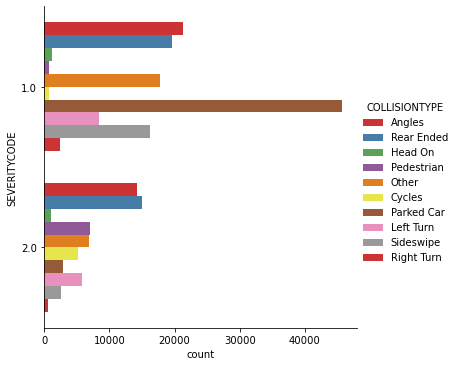

In [16]:
sns.catplot(y='SEVERITYCODE', hue='COLLISIONTYPE', kind='count', palette='Set1', data=dataset)

* <b>Result:</b> This assumption is true, and can be validated from the above graph. For Severity Code=1, i.e. Non-Injury type accidents, the major collision type is 'Parked Car'. While for Injury type accidents (Code 2), the number of 'Parked Car' accidents is very less.

<b> Correlation Matrix </b>

In [17]:
dataset[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','INJURIES']].corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,INJURIES
SEVERITYCODE,1.000000,0.128840,0.259243,0.217701,0.811250
PERSONCOUNT,0.128840,1.000000,-0.019099,-0.038833,0.279333
PEDCOUNT,0.259243,-0.019099,1.000000,-0.019368,0.159475
PEDCYLCOUNT,0.217701,-0.038833,-0.019368,1.000000,0.115178
INJURIES,0.811250,0.279333,0.159475,0.115178,1.000000


<b> Relation Plots </b>

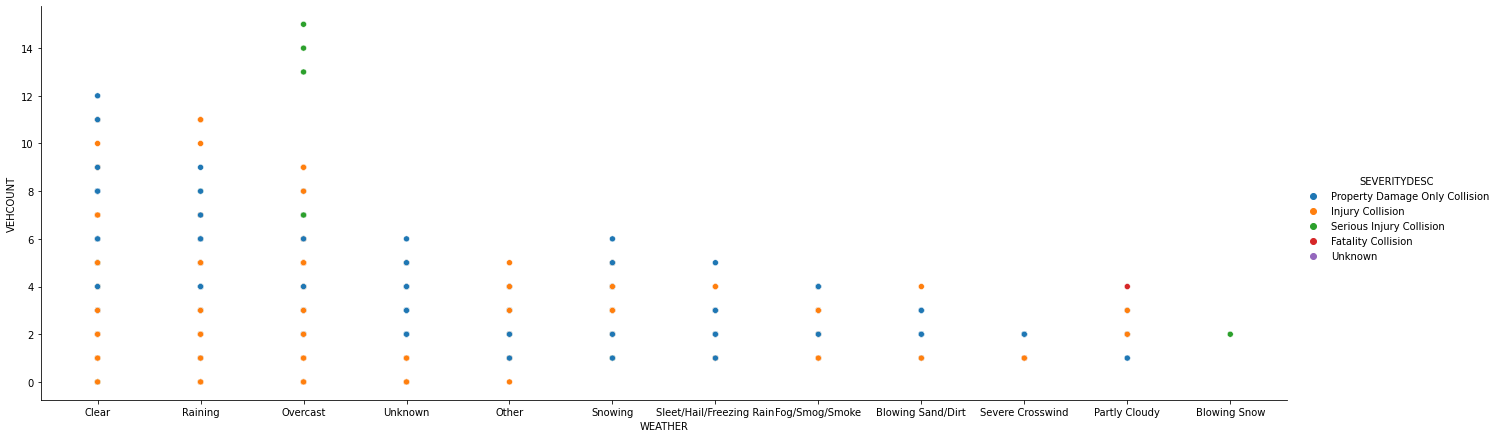

In [18]:
# Weather vs Vehicle Count by Severity of Accidents
sns.relplot(x='WEATHER', y='VEHCOUNT', data=dataset, height = 6, aspect=3, hue='SEVERITYDESC')

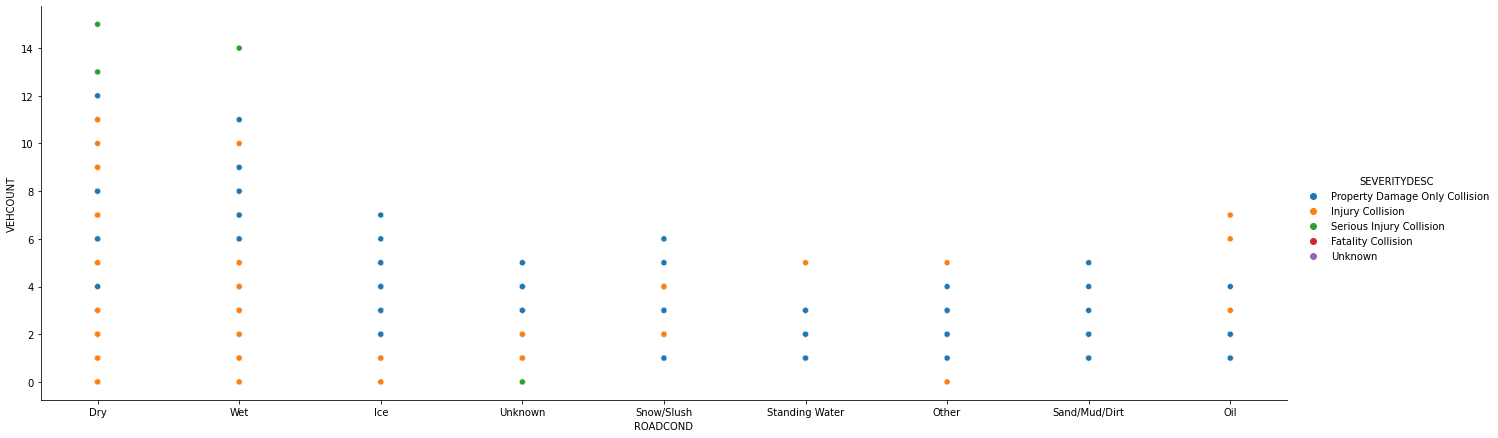

In [19]:
# Road Conditions vs Vehicle Count by Severity of Accidents
sns.relplot(x='ROADCOND', y='VEHCOUNT', data=dataset, height = 6, aspect=3, hue='SEVERITYDESC')

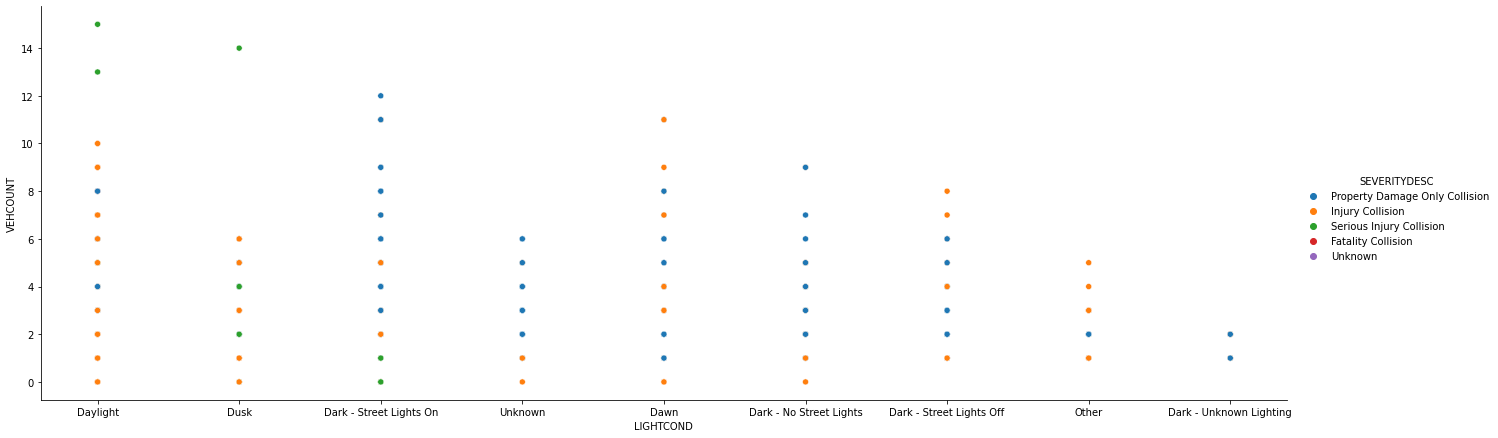

In [20]:
# Light Conditions vs Vehicle Count by Severity of Accidents
sns.relplot(x='LIGHTCOND', y='VEHCOUNT', data=dataset, height = 6, aspect=3, hue='SEVERITYDESC')

<b> Box Plots </b>

Here, we'll plot a few box plots to understand the data distribution and outliers.

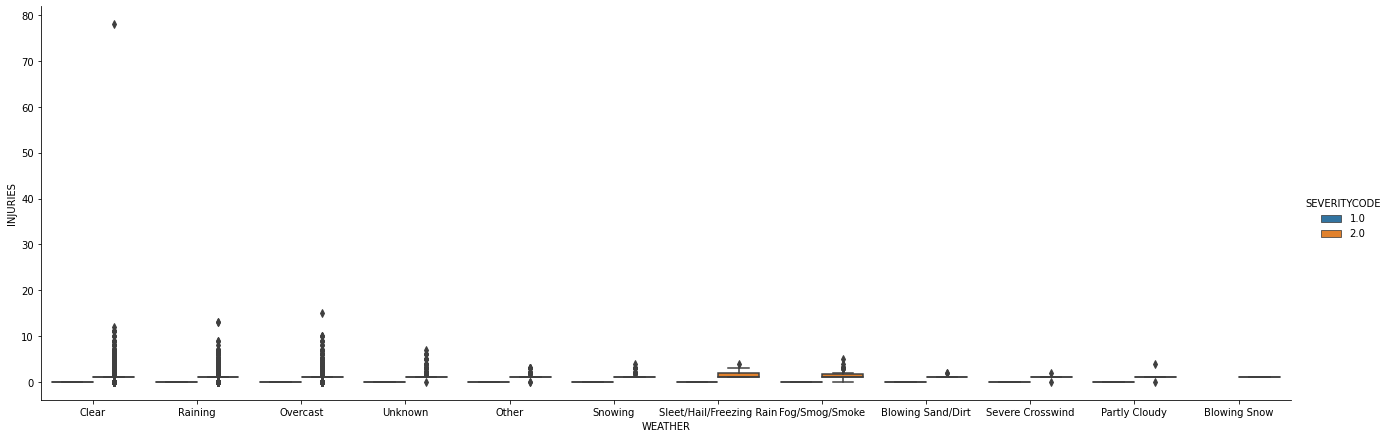

In [21]:
# Weather vs Injuries by Severity of Accidents
sns.catplot(x='WEATHER', y='INJURIES', data=dataset, kind = 'box', height = 6, aspect=3, hue='SEVERITYCODE')

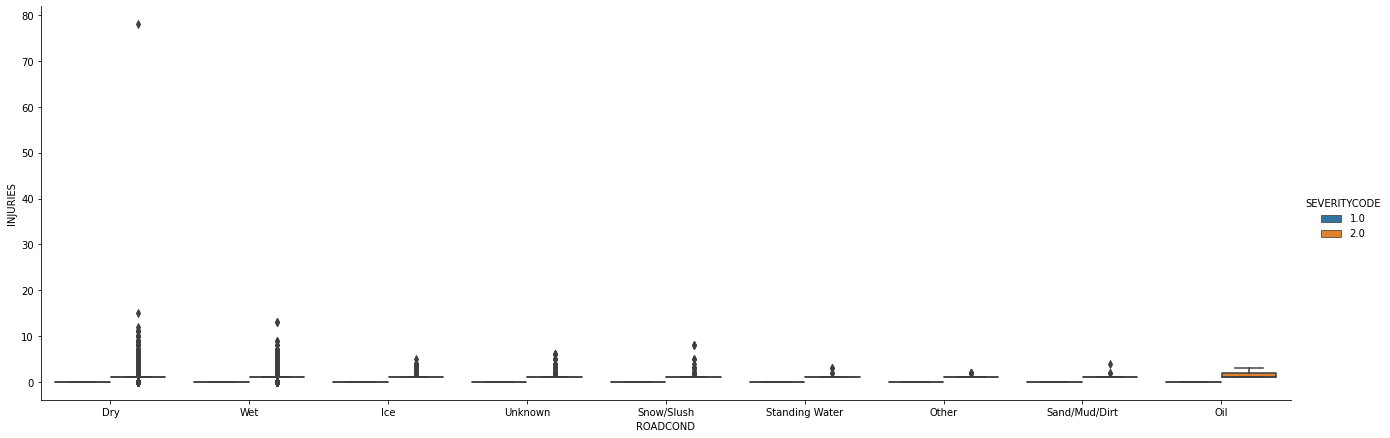

In [22]:
# Road Conditions vs Injuries by Severity of Accidents
sns.catplot(x='ROADCOND', y='INJURIES', data=dataset, kind = 'box', height = 6, aspect=3, hue='SEVERITYCODE')

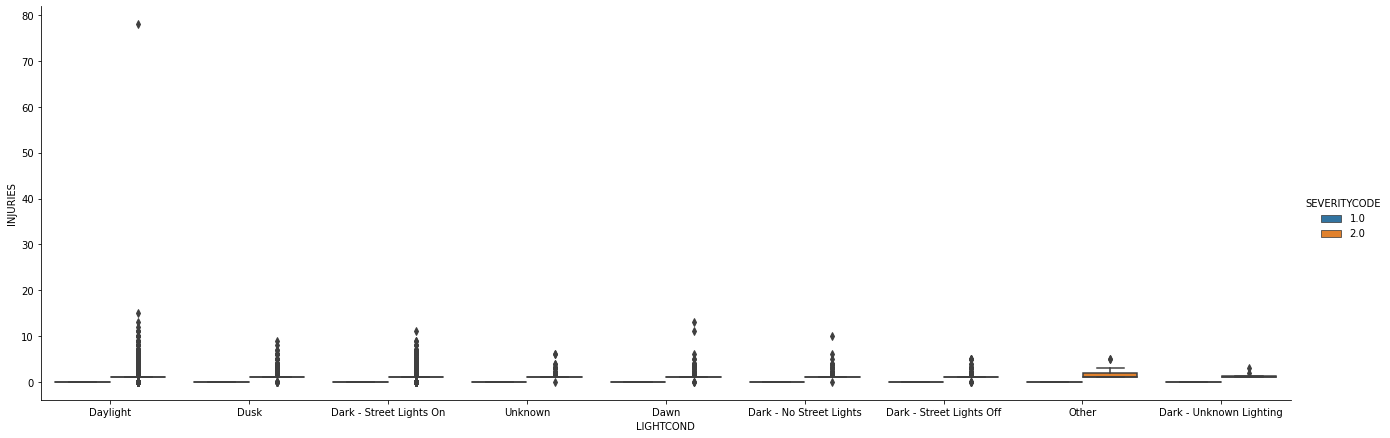

In [23]:
# Light Conditions vs Injuries by Severity of Accidents
sns.catplot(x='LIGHTCOND', y='INJURIES', data=dataset, kind = 'box', height = 6, aspect=3, hue='SEVERITYCODE')

Now that we have understood the data and the relationships, we can go ahead and drop the rest of the columns which we won't require for our model.

In [24]:
#Dropping the columns that are not necessary for our analysis
dataset.drop(['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES'
              ,'JUNCTIONTYPE'], axis='columns', inplace=True)
dataset.head()

,OBJECTID,SEVERITYCODE,SEVERITYDESC,INCDATE,WEATHER,ROADCOND,LIGHTCOND
0,1,1.0,Property Damage Only Collision,2020/01/19 00:00:00+00,Clear,Dry,Daylight
1,2,1.0,Property Damage Only Collision,2005/04/11 00:00:00+00,Raining,Wet,Dusk
2,3,2.0,Injury Collision,2013/03/31 00:00:00+00,Clear,Dry,Dark - Street Lights On
3,4,2.0,Injury Collision,2020/01/06 00:00:00+00,Raining,Wet,Dark - Street Lights On
4,5,2.0,Injury Collision,2009/12/25 00:00:00+00,Clear,Ice,Dark - Street Lights On


### Handling Null/Missing Values

Here, we will run a set of descriptive statistics on different features to identify the NaN/Missing/Unknown values and remove/modify them for use in our model.

In [25]:
#Looking at null values
dataset.isna().sum()

OBJECTID           0
SEVERITYCODE       1
SEVERITYDESC       0
INCDATE            0
WEATHER         4987
ROADCOND        4906
LIGHTCOND       5076
dtype: int64

We observe that there is 1 value with NaN for SEVERITYCODE. The first step will be to remove that value.

In [26]:
#Removing the values where SEVERITYCODE is NaN
dataset = dataset.dropna(axis=0, how='all', subset=['SEVERITYCODE'])

There are several NaN values for ROADCOND, LIGHTCOND and WEATHER variables. It is okay if one of them is NaN and the rest are present, but if all three values are NaN for a particular accident, it doesn't make any sense to put them in our model. So we shall remove the rows where all the three values are NaN.

In [27]:
#Removing the values where ROADCOND, LIGHTCOND, WEATHER are NaN, as these are of no use to our model
dataset = dataset.dropna(axis=0, how='all', subset=['WEATHER','ROADCOND','LIGHTCOND'])
dataset.isna().sum()

OBJECTID          0
SEVERITYCODE      0
SEVERITYDESC      0
INCDATE           0
WEATHER         147
ROADCOND         66
LIGHTCOND       236
dtype: int64

4840 records which had NaN values for all the three features (ROADCOND, LIGHTCOND, WEATHER) have been removed.

For the remaining NaN values in ROADCOND, LIGHTCOND, WEATHER - we will input the 'Mode' value of the feature for the corresponding severity.

In [28]:
dataset.groupby(['SEVERITYCODE'])['WEATHER'].value_counts()

SEVERITYCODE  WEATHER                 
1.0           Clear                       76205
              Raining                     22172
              Overcast                    19203
              Unknown                     14275
              Snowing                       738
              Other                         730
              Fog/Smog/Smoke                383
              Sleet/Hail/Freezing Rain       85
              Blowing Sand/Dirt              41
              Severe Crosswind               18
              Partly Cloudy                   5
2.0           Clear                       38601
              Raining                     11865
              Overcast                     9352
              Unknown                       856
              Fog/Smog/Smoke                194
              Snowing                       181
              Other                         130
              Sleet/Hail/Freezing Rain       31
              Blowing Sand/Dirt              15
 

In [29]:
dataset.groupby(['SEVERITYCODE'])['ROADCOND'].value_counts()

SEVERITYCODE  ROADCOND      
1.0           Dry               85505
              Wet               32000
              Unknown           14353
              Ice                 938
              Snow/Slush          839
              Other                90
              Standing Water       86
              Sand/Mud/Dirt        54
              Oil                  40
2.0           Dry               43155
              Wet               16734
              Unknown             786
              Ice                 294
              Snow/Slush          175
              Other                46
              Standing Water       33
              Oil                  24
              Sand/Mud/Dirt        23
Name: ROADCOND, dtype: int64

In [30]:
dataset.groupby(['SEVERITYCODE'])['LIGHTCOND'].value_counts()

SEVERITYCODE  LIGHTCOND               
1.0           Daylight                    78520
              Dark - Street Lights On     34346
              Unknown                     12898
              Dusk                         3997
              Dawn                         1706
              Dark - No Street Lights      1214
              Dark - Street Lights Off      890
              Other                         186
              Dark - Unknown Lighting        16
2.0           Daylight                    41032
              Dark - Street Lights On     15793
              Dusk                         2088
              Dawn                          903
              Unknown                       635
              Dark - No Street Lights       366
              Dark - Street Lights Off      349
              Other                          58
              Dark - Unknown Lighting         8
Name: LIGHTCOND, dtype: int64

We observe that the mode values for ROADCOND, LIGHTCOND, WEATHER are 'Dry', 'Daylight' and 'Clear' respectively, and they don't change with the severity condition. Hence we shall input these into the NaN values

In [31]:
dataset['LIGHTCOND'].fillna('Daylight', inplace=True)
dataset['WEATHER'].fillna('Clear', inplace=True)
dataset['ROADCOND'].fillna('Dry', inplace=True)

In [32]:
dataset.isna().sum()

OBJECTID        0
SEVERITYCODE    0
SEVERITYDESC    0
INCDATE         0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

We also noticed that there are many values 'Unknown' in our dataset for the ROADCOND, LIGHTCOND, WEATHER attributes. Again, these will be of no use to our model. We must remove them as well. 

In [33]:
unknown_rows = dataset[(dataset['ROADCOND'] == 'Unknown') & (dataset['LIGHTCOND'] == 'Unknown') & (dataset['WEATHER'] == 'Unknown') ].index
dataset.drop(unknown_rows , inplace=True)

### Balancing the Dataset

The next step is to balance the values of the target variable. We have seen earlier that the no. of records with 'SEVERITYCODE'= 1 are far more than those with 'SEVERITYCODE'= 2. So, we will need to balance them to ensure there is no bias in the model.

In [34]:
dataset["SEVERITYCODE"].value_counts()

1.0    124071
2.0     60947
Name: SEVERITYCODE, dtype: int64

In [35]:
#Downsampling for balanced dataset

dataset_1 = dataset[dataset['SEVERITYCODE'] == 1]
dataset_2 = dataset[dataset['SEVERITYCODE'] == 2]

resampled_dataset_1 = dataset_1.sample(n=60947,replace=False,random_state=1)
dataset_balanced = pd.concat([resampled_dataset_1,dataset_2])

dataset_balanced["SEVERITYCODE"].value_counts()

2.0    60947
1.0    60947
Name: SEVERITYCODE, dtype: int64

In [36]:
dataset_balanced.isna().sum()

OBJECTID        0
SEVERITYCODE    0
SEVERITYDESC    0
INCDATE         0
WEATHER         0
ROADCOND        0
LIGHTCOND       0
dtype: int64

### Feature Transformation and Encoding

Now we shall convert the fields into the correct datatypes. 'INCDATE' field is of Object type, needs to be converted to Datetime.

In [37]:
#Convert string to timestamp
import datetime as dt
import pytz

dataset_balanced['INCDATE'] = dataset_balanced['INCDATE'].str[:10]
dataset_balanced['INCDATE'] = dataset_balanced['INCDATE'].apply(lambda x: 
                                                                dt.datetime.strptime(x,'%Y/%m/%d'))

dataset_balanced.dtypes

OBJECTID                 int64
SEVERITYCODE           float64
SEVERITYDESC            object
INCDATE         datetime64[ns]
WEATHER                 object
ROADCOND                object
LIGHTCOND               object
dtype: object

We also have categorical variables which need to be converted to numerical/binary variables before using them in our model. However, there are plenty of categories for each variable. We shall group these first. 

In [38]:
dataset_balanced['LIGHTCOND'].value_counts()

Daylight                    79844
Dark - Street Lights On     32560
Dusk                         4085
Dawn                         1764
Unknown                      1735
Dark - No Street Lights       973
Dark - Street Lights Off      768
Other                         148
Dark - Unknown Lighting        17
Name: LIGHTCOND, dtype: int64

We can group the major lighting conditions into 'Daylight', 'Dark', 'Dawn/Dusk' and 'Others (Light)'. The rest of the categories can be mapped to one of the above 4 categories as shown below:

In [39]:
# Daylight                   ------> Daylight
# Dark - Street Lights On    ------> Dark
# Dusk                       ------> Dawn/Dusk
# Unknown                    ------> Others (Light)
# Dawn                       ------> Dawn/Dusk
# Dark - No Street Lights    ------> Dark
# Dark - Street Lights Off   ------> Dark
# Other                      ------> Others (Light)
# Dark - Unknown Lighting    ------> Dark

dataset_balanced["LIGHTCOND"].replace(to_replace=['Dark - Street Lights On',
                                                  'Dark - No Street Lights',
                                                  'Dark - Street Lights Off',
                                                  'Dark - Unknown Lighting',
                                                  'Other',
                                                  'Unknown',
                                                  'Dawn',
                                                  'Dusk'], 
                                      value=['Dark','Dark','Dark','Dark','Others (Light)',
                                             'Others (Light)','Dawn/Dusk','Dawn/Dusk'],inplace=True)

dataset_balanced['LIGHTCOND'].value_counts()

Daylight          79844
Dark              34318
Dawn/Dusk          5849
Others (Light)     1883
Name: LIGHTCOND, dtype: int64

Similarly for Road Conditions

In [40]:
dataset_balanced['ROADCOND'].value_counts()

Dry               85229
Wet               32401
Unknown            2643
Ice                 782
Snow/Slush          580
Other                92
Standing Water       72
Oil                  48
Sand/Mud/Dirt        47
Name: ROADCOND, dtype: int64

We can group the major road conditions into 'Dry', 'Wet', 'Ice/Snow' and 'Others (Road)'. The rest of the categories can be mapped to one of the above 4 categories as shown below:

In [41]:
# Dry             ------> Dry
# Wet             ------> Wet
# Unknown         ------> Others (Road)
# Ice             ------> Ice/Snow
# Snow/Slush      ------> Ice/Snow  
# Other           ------> Others (Road)
# Standing Water  ------> Wet
# Oil             ------> Others (Road)  
# Sand/Mud/Dirt   ------> Others (Road)

dataset_balanced["ROADCOND"].replace(to_replace=['Unknown',
                                                  'Ice',
                                                  'Snow/Slush',
                                                  'Other',
                                                  'Standing Water',
                                                  'Oil',
                                                  'Sand/Mud/Dirt'], 
                                      value=['Others (Road)','Ice/Snow','Ice/Snow','Others (Road)','Wet',
                                             'Others (Road)','Others (Road)'],inplace=True)

dataset_balanced['ROADCOND'].value_counts()

Dry              85229
Wet              32473
Others (Road)     2830
Ice/Snow          1362
Name: ROADCOND, dtype: int64

And finally for Weather Conditions

In [42]:
dataset_balanced['WEATHER'].value_counts()

Clear                       76143
Raining                     22781
Overcast                    18779
Unknown                      2642
Snowing                       538
Other                         501
Fog/Smog/Smoke                373
Sleet/Hail/Freezing Rain       76
Blowing Sand/Dirt              38
Severe Crosswind               15
Partly Cloudy                   7
Blowing Snow                    1
Name: WEATHER, dtype: int64

We can group the weather conditions into 'Clear', 'Raining', 'Overcast', 'Snowing' and 'Others (Weather)'. The rest of the categories can be mapped to one of the above 4 categories as shown below:

In [43]:
# Clear                     ------> Clear
# Raining                   ------> Raining
# Overcast                  ------> Overcast
# Unknown                   ------> Others (Weather)
# Snowing                   ------> Snowing
# Other                     ------> Others (Weather)  
# Fog/Smog/Smoke            ------> Others (Weather)
# Sleet/Hail/Freezing Rain  ------> Snowing
# Blowing Sand/Dirt         ------> Others (Weather)  
# Severe Crosswind          ------> Others (Weather)
# Partly Cloudy             ------> Others (Weather)
# Blowing Snow              ------> Snowing

dataset_balanced["WEATHER"].replace(to_replace=['Unknown',
                                                 'Other',
                                                 'Fog/Smog/Smoke',
                                                 'Sleet/Hail/Freezing Rain',
                                                 'Blowing Sand/Dirt',
                                                 'Severe Crosswind',
                                                 'Partly Cloudy',
                                                 'Blowing Snow'], 
                                      value=['Others (Weather)','Others (Weather)','Others (Weather)','Snowing',
                                             'Others (Weather)','Others (Weather)','Others (Weather)','Snowing'],
                                     inplace=True)

dataset_balanced['WEATHER'].value_counts()

Clear               76143
Raining             22781
Overcast            18779
Others (Weather)     3576
Snowing               615
Name: WEATHER, dtype: int64

Now, since our variables are not ordinal, we can't convert them to numerical variables. We will have to use <b>One Hot Encoding</b> to convert the categorical variables to binary variables and append them to our dataset. We'll also drop the irrelevant columns to arrive at the final dataset to be used in our model.

In [44]:
#Using One Hot Encoding
dataset_final = dataset_balanced[['SEVERITYCODE']]
dataset_final = pd.concat([dataset_final,pd.get_dummies(dataset_balanced['LIGHTCOND']),
                                         pd.get_dummies(dataset_balanced['ROADCOND']),
                                         pd.get_dummies(dataset_balanced['WEATHER'])], axis=1)
dataset_final.head()

,SEVERITYCODE,Dark,Dawn/Dusk,Daylight,Others (Light),Dry,Ice/Snow,Others (Road),Wet,Clear,Others (Weather),Overcast,Raining,Snowing
137362,1.0,0,0,1,0,1,0,0,0,1,0,0,0,0
82507,1.0,0,0,1,0,1,0,0,0,1,0,0,0,0
198733,1.0,0,0,1,0,1,0,0,0,1,0,0,0,0
11193,1.0,0,0,1,0,1,0,0,0,1,0,0,0,0
120729,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0


Our dataset is ready for being used in our model. We can now proceed with the modelling stage.

## Methodology

We shall be using 3 Machine Learning techniques for our modelling:
- K Nearest Neighbours
- Decision Tree
- Logistic Regression

### Feature Selection

Let us first extract the features X (input variables) and y (target variable) from our dataset.

In [45]:
X = dataset_final.drop(['SEVERITYCODE'],axis='columns')
y = dataset_final['SEVERITYCODE'].values

Since all the input variables are binary, there is no need to normalize them

### Splitting data into Train-Test Samples

The next step will be to split our dataset into the training set (on which our model will learn) and the test set (which will be used to validate the accuracy of the model). The All the 3 models will use the same samples for train and test.

We shall use a 70-30 Train/Test split.

In [46]:
#Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)

In [47]:
print('Train data has shape', X_train.shape)
print('Test data has shape', X_test.shape)

Train data has shape (85325, 13)
Test data has shape (36569, 13)


### K-Nearest Neighbour (KNN) Classification

K-NN will find the most similar data point within 'k' distance, and based on the input params, predict the severity of an accident.

In [48]:
# Import library
from sklearn.neighbors import KNeighborsClassifier

k = 6 #inital value of k assumed to be 6
model_knn = KNeighborsClassifier(n_neighbors = k)
model_knn.fit(X_train,y_train)
yhat_knn = model_knn.predict(X_test)
print("KNN executed successfully")

KNN executed successfully


In [49]:
from sklearn import metrics

print("KNN Train Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("KNN Test Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

KNN Train Accuracy:  0.5019865221213009
KNN Test Accuracy:  0.500615275233121


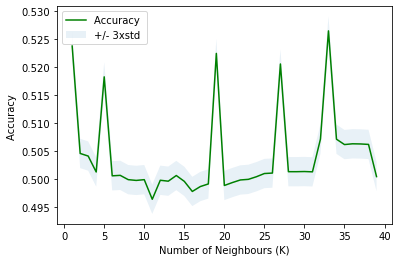

0.5264841805901174

In [50]:
#Changing K to find optimal value

k_optimal = 40
mean_acc = np.zeros((k_optimal-1))
std_acc = np.zeros((k_optimal-1))
Confusion_Matrix = [];
for n in range(1,k_optimal):
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn = model_knn.predict(X_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

plt.plot(range(1,k_optimal),mean_acc,'g')
plt.fill_between(range(1,k_optimal),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.show()

mean_acc.max()

In [51]:
for i,j in zip(range(1,k_optimal),mean_acc):
    print("k:",i,"acc:",j)

k: 1 acc: 0.5237769695643851
k: 2 acc: 0.504607727856928
k: 3 acc: 0.5041428532363478
k: 4 acc: 0.5012989143810331
k: 5 acc: 0.5182805108151713
k: 6 acc: 0.500615275233121
k: 7 acc: 0.5006973119308704
k: 8 acc: 0.4999316360852088
k: 9 acc: 0.49979490825562634
k: 10 acc: 0.4999316360852088
k: 11 acc: 0.4964314036478985
k: 12 acc: 0.49982225382154283
k: 13 acc: 0.49965818042604393
k: 14 acc: 0.500669966364954
k: 15 acc: 0.49963083486012744
k: 16 acc: 0.49782602750963934
k: 17 acc: 0.49870108561896687
k: 18 acc: 0.4991659602395472
k: 19 acc: 0.5224643824003937
k: 20 acc: 0.4988925045803823
k: 21 acc: 0.49941207033279555
k: 22 acc: 0.4998769449533758
k: 23 acc: 0.4999863272170418
k: 24 acc: 0.500451201837622
k: 25 acc: 0.5010254587218682
k: 26 acc: 0.5011074954196177
k: 27 acc: 0.5205775383521561
k: 28 acc: 0.5013536055128661
k: 29 acc: 0.5013536055128661
k: 30 acc: 0.5013809510787826
k: 31 acc: 0.5013262599469496
k: 32 acc: 0.5071782110530777
k: 33 acc: 0.5264841805901174
k: 34 acc: 0.507

There is little difference in the accuracy values for different k values. For k=33, a marginally higher accuracy of 0.526 is observed.

### Decision Tree Classification

The Decision Tree will examine all possible outcomes by varying the road, light and weather conditions and predict the severity of accidents 

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


model_dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 13)
model_dtree.fit(X_train,y_train)
yhat_dtree = model_dtree.predict(X_test)
print("Decision Tree Classifier executed successfully")

Decision Tree Classifier executed successfully


In [109]:
#Text Representation of Decision Tree
text_representation = tree.export_text(model_dtree)
print(text_representation)

|--- feature_6 <= 0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- feature_5 <= 0.50
|   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |--- feature_12 <= 0.50
|   |   |   |   |   |   |   |--- feature_1 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_11 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |   |--- feature_11 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- feature_1 >  0.50
|   |   |   |   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_8 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |   |--- feature_8 >  0.50
|   |   |   |   |   |   |   

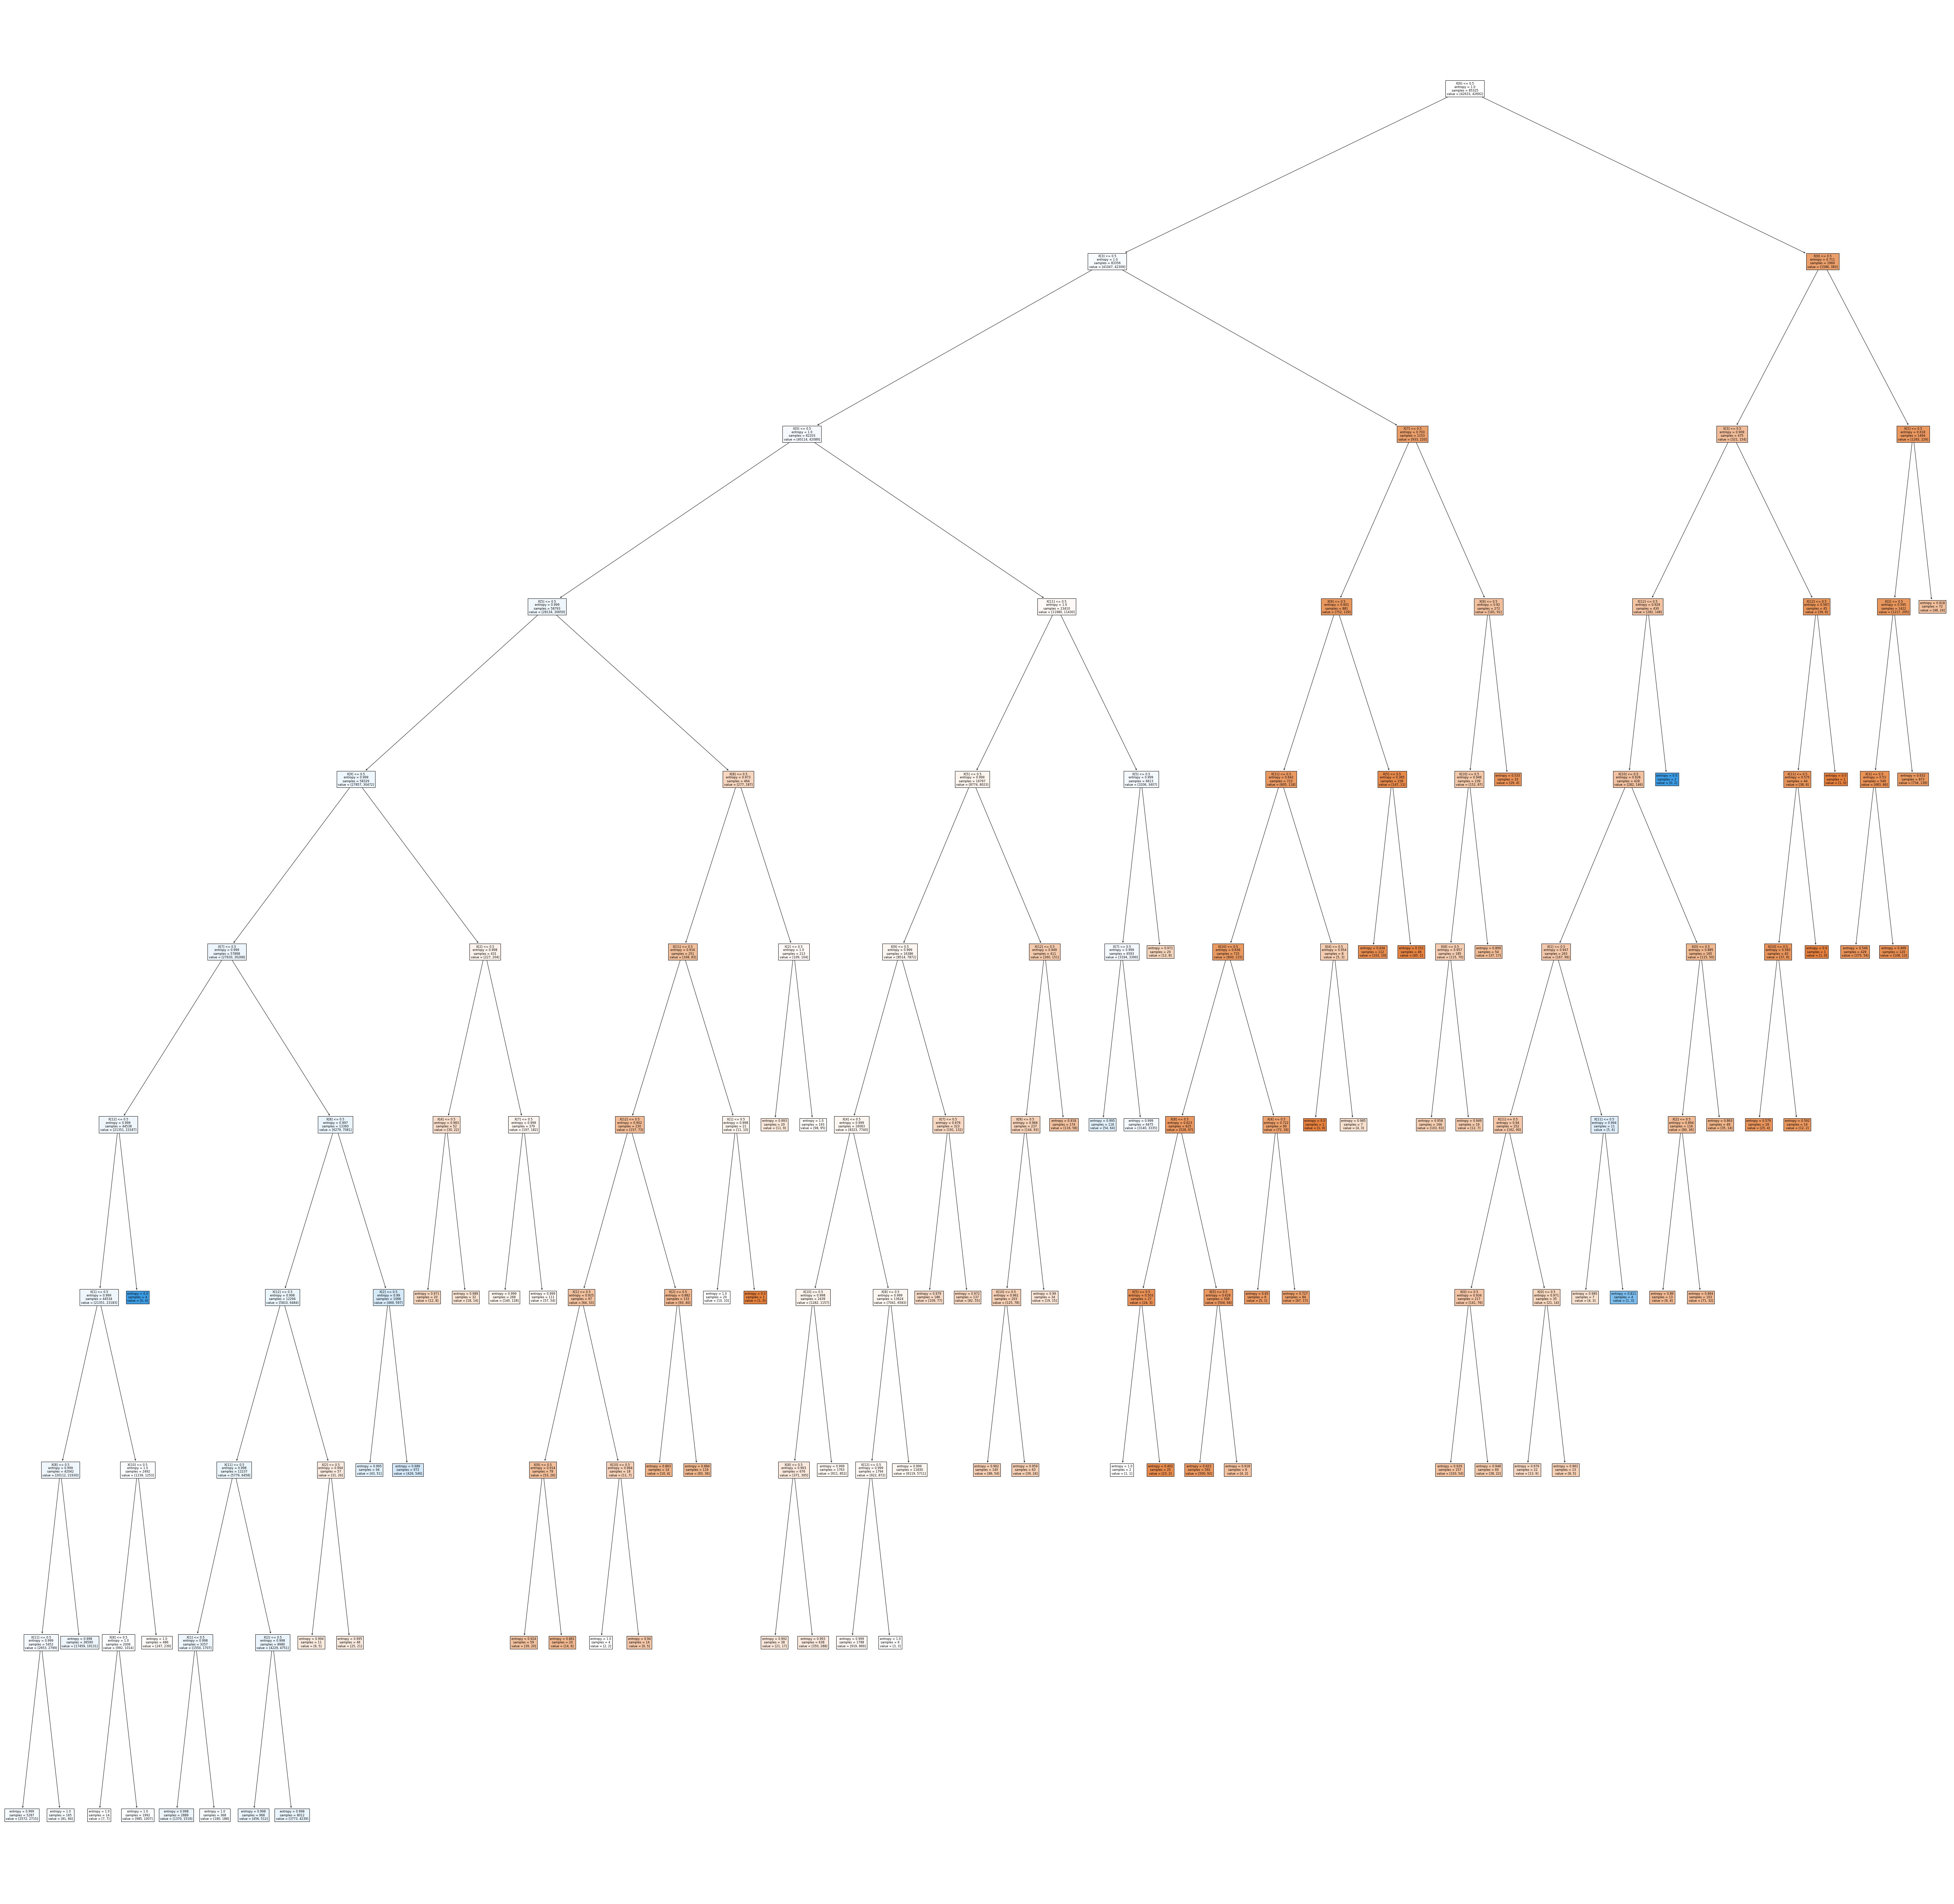

In [108]:
#Graphical Representation of Decision Tree
fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(model_dtree, filled=True)
fig.savefig("d_tree.png")

In [110]:
print("Decision Tree Train Accuracy: ", metrics.accuracy_score(y_train, model_dtree.predict(X_train)))
print("Decision Tree Test Accuracy: ", metrics.accuracy_score(y_test, yhat_dtree))

Decision Tree Train Accuracy:  0.533173161441547
Decision Tree Test Accuracy:  0.5328010063168257


### Logistic Regression

We have reduced our target variable to a binary one, so using Logistic Regression can be effective in predicting the severity of accidents.

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

model_lr = LogisticRegression(C=1, solver='liblinear')
model_lr.fit(X_train,y_train)
yhat_lr = model_lr.predict(X_test)
yhat_lr_prob = model_lr.predict_proba(X_test)
print("Logistic Regression executed successfully")

Logistic Regression executed successfully


In [118]:
print("LR Train Accuracy: ", metrics.accuracy_score(y_train, model_lr.predict(X_train)))
print("LR Test Accuracy: ", metrics.accuracy_score(y_test, yhat_lr))
print("Logarithmic Loss Score: ", log_loss(y_test,yhat_lr_prob))
print("Confusion Matrix: \n", confusion_matrix(y_test, yhat_lr, labels=[1,2]))

LR Train Accuracy:  0.5328684441840024
LR Test Accuracy:  0.53315649867374
Logarithmic Loss Score:  0.6843327483408435
Confusion Matrix: 
 [[ 5158 13156]
 [ 3916 14339]]


Thus, we have successfully employed the 3 models - KNN Classification, Decision Tree and Logistic Regression - on our data. All the three models have yielded similar accuracy figures for our Train and Test data.

### Model Evaluation using the Test Set

Here, in addition to the accuracy metrics, we shall be looking at the <b> Jaccard Similarity Score </b> and <b> f1 Score </b> for each model, to give us a better idea of which model is more suited.

In [119]:
# Importing the libraries
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#Computing jaccard and f1 score for KNN
knn_jaccard = jaccard_score(y_test, yhat_knn)
knn_f1_score = f1_score(y_test, yhat_knn, average='weighted')
knn_acc = mean_acc.max()

#Computing jaccard and f1 score for Decision Tree
dtree_jaccard = jaccard_score(y_test, yhat_dtree)
dtree_f1_score = f1_score(y_test, yhat_dtree, average='weighted')

#Computing jaccard, f1 score and Logarithmic Loss for Logistic Regression
lr_jaccard = jaccard_score(y_test, yhat_lr)
lr_f1_score = f1_score(y_test, yhat_lr, average='weighted')
lr_log_loss = log_loss(y_test, yhat_lr_prob)

In [120]:
# Tabulating a summary of the results 
report = {'Test Accuracy': [mean_acc.max(), metrics.accuracy_score(y_test, yhat_dtree), metrics.accuracy_score(y_test, yhat_lr)],
          'Jaccard': [knn_jaccard, dtree_jaccard, lr_jaccard], 
          'F1-score':[knn_f1_score, dtree_f1_score, lr_f1_score],
          'LogLoss': ['NA', 'NA', lr_log_loss]}
df_report = pd.DataFrame(report, index =['KNN', 'Decision Tree', 'LogisticRegression'])
df_report

,Test Accuracy,Jaccard,F1-score,LogLoss
KNN,0.526484,0.397626,0.487656,NA
Decision Tree,0.532801,0.233994,0.502151,NA
LogisticRegression,0.533156,0.232029,0.501550,0.684333


We can see that the 3 models have similar Test Accuracy, so any of them can be chosen. However, the Jaccard score for KNN Classification is substantially higher than Decision Tree and Logistic Regression. Hence, I would recommend this model to be used for predicting the severity of accidents. 